In [145]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [146]:
df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\datasets\\Telecom_customer_churn.csv")

### EDA

In [91]:
pd.set_option("display.max_columns",None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


customerID is unique identity of each customer

Tenure: Plan taken by customer

In [92]:
df.shape

(7043, 21)

Shape of Dataset
* 7043 rows
* 21 columns

In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges is seems to contineous but here as we can see above it's datatype is Object. need to correct that.

In [96]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

`There is no missing or Nan value in dataset`

In [97]:
df.isin([" "]).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There is 11 blank spaces or we can say Nan in Dataset

In [8]:
df.nunique().sort_values()

Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PaperlessBilling       2
PhoneService           2
Contract               3
StreamingMovies        3
StreamingTV            3
TechSupport            3
OnlineBackup           3
OnlineSecurity         3
InternetService        3
MultipleLines          3
DeviceProtection       3
PaymentMethod          4
tenure                73
MonthlyCharges      1585
TotalCharges        6531
customerID          7043
dtype: int64

<AxesSubplot:>

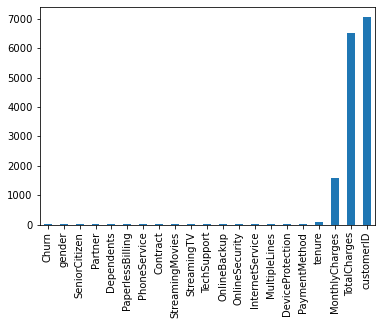

In [10]:
df.nunique().sort_values().plot.bar()

Three contineous columns we have

In [147]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [148]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There is 11 Missing Values in this dataset

In [149]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

* SeniorCitizen is categorical column
* TotalCharges has a little skewness

## Univariate Analysis

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

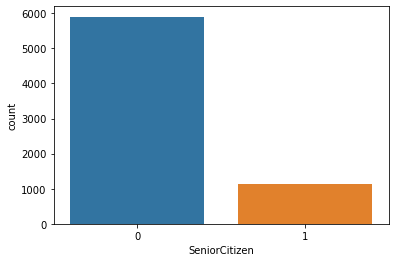

In [12]:
sns.countplot(df["SeniorCitizen"],data=df)

__People who have attain the age of 60 is considered as senior citizen and here we have large no of user who is below 60__

<AxesSubplot:xlabel='gender', ylabel='count'>

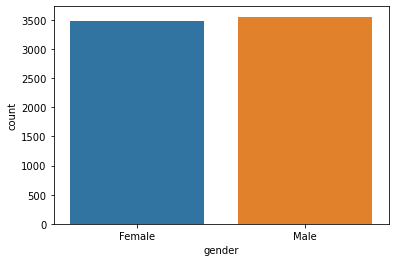

In [13]:
sns.countplot(df["gender"],data=df)

We have balanced no. of Female and Male in our dataset

<AxesSubplot:xlabel='Partner', ylabel='count'>

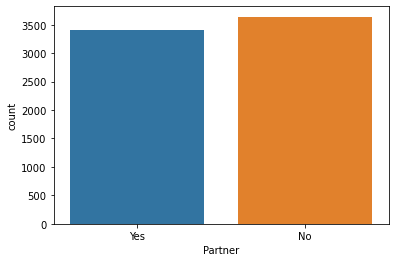

In [14]:
sns.countplot(df["Partner"])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

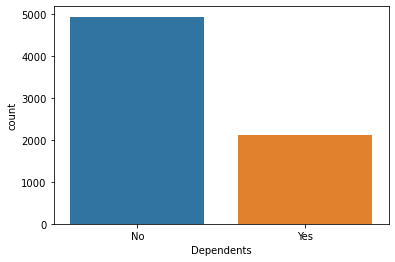

In [17]:
sns.countplot(df["Dependents"])

There is only few customer who enrolled their dependents or we can say they pay their dependents bill.

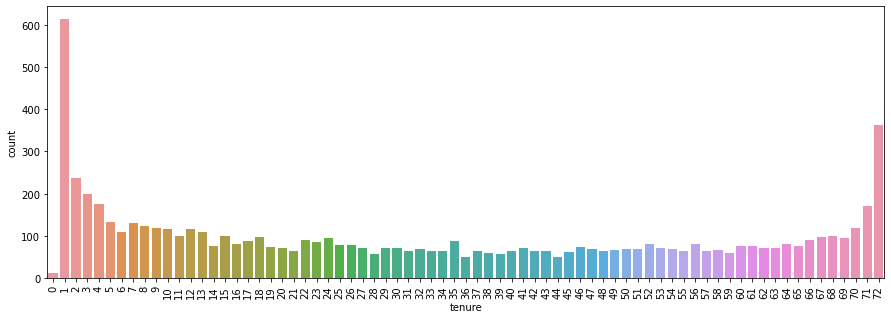

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(df["tenure"])
plt.xticks(rotation=90)
plt.show()

As we can see there are customer who take long tenure plan but their high counts of customer who prefer monthly basis plan. 

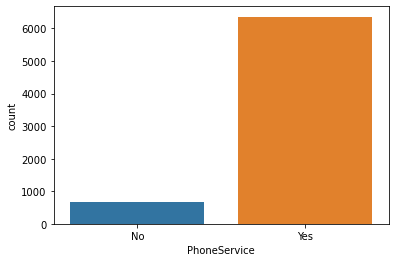

In [23]:
sns.countplot(df["PhoneService"])
plt.show()

There is large no. of clients who have who have broadband or phoneservice at their place

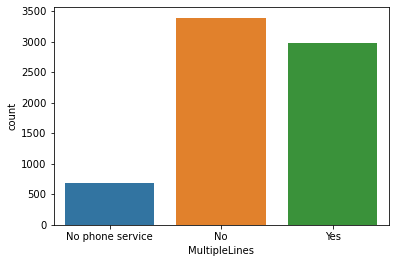

In [24]:
sns.countplot(df["MultipleLines"])
plt.show()

Their is people who has multiple connection may be office work or may be they need extra connection

<AxesSubplot:xlabel='InternetService', ylabel='count'>

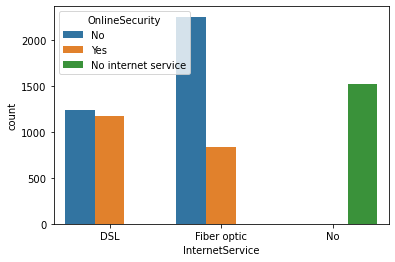

In [25]:
sns.countplot(df["InternetService"],data=df,hue="OnlineSecurity")

Customer having DSL connection also having Online Security but the ratio of Fiberoptic and Internet Security is very low. and we can also see there are few customer who even do not have internet connection

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

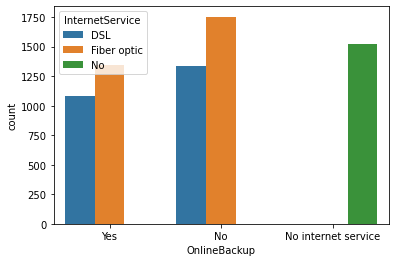

In [28]:
sns.countplot(df["OnlineBackup"],data=df,hue="InternetService")

People must have InternetConnection for online backup Ratio of Online Backup and Internet connnection whether it's DSL or Optical Fiber both are same

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

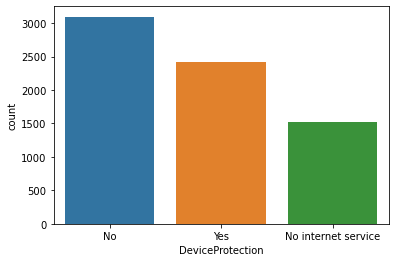

In [31]:
sns.countplot(df["DeviceProtection"],data=df)

There is very less people who purchase DeviceProtection

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

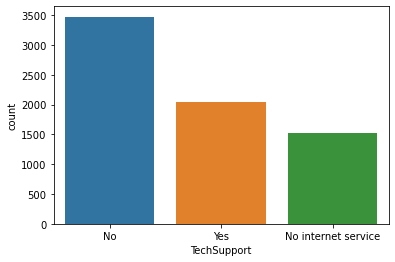

In [32]:
sns.countplot(df["TechSupport"])

There is very few people who has the TechSupport.

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

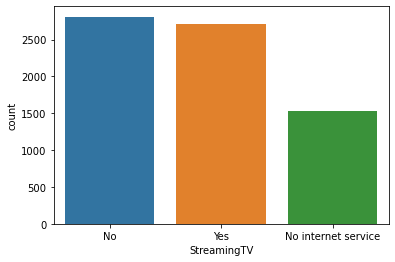

In [33]:
sns.countplot(df["StreamingTV"])

There is almost equal ratio of people having internet connection used to streaming Online tv

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

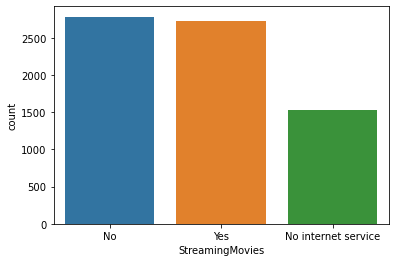

In [36]:
sns.countplot(df["StreamingMovies"])

There is almost equal ratio of people having internet connection used to streaming Online Movies

<AxesSubplot:xlabel='Contract', ylabel='count'>

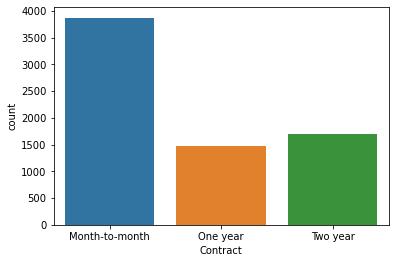

In [37]:
sns.countplot(df["Contract"],data=df)

Mostly customer prefer monthly plan`

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

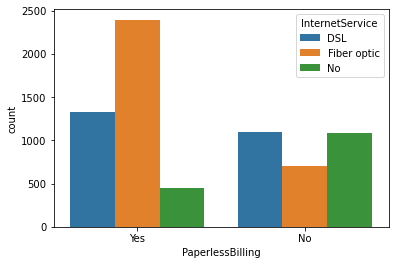

In [40]:
sns.countplot(df["PaperlessBilling"],data=df,hue="InternetService")

As we can see above the customer having InternetServices they preferred Online Billing system

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

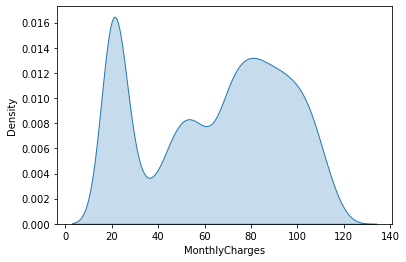

In [47]:
sns.kdeplot(df["MonthlyCharges"],data=df,fill=True)

Data is seems to Guassian Distributed

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

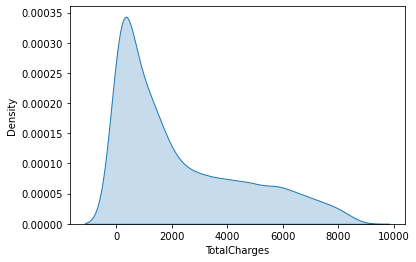

In [100]:
sns.kdeplot(df["TotalCharges"],data=df,fill=True)

Data is seems to be Guassian Distributed

<AxesSubplot:xlabel='Churn', ylabel='count'>

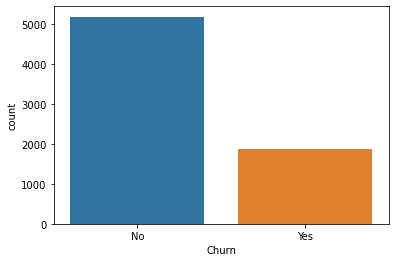

In [113]:
sns.countplot(df["Churn"],data=df)

Target Class is Imbalanced

## Bivariate Analysis

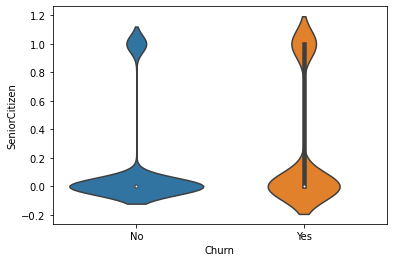

In [104]:
sns.violinplot(df["Churn"],df["SeniorCitizen"])
plt.show()

Senior citizen less Churn

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

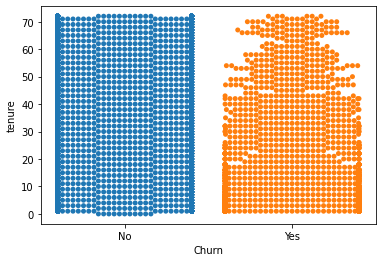

In [110]:
sns.swarmplot(df["Churn"],df["tenure"])

As the tenures increases the Chances of Churn decreases

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

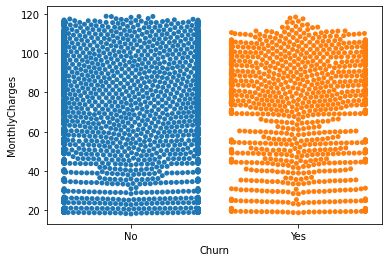

In [111]:
sns.swarmplot(df["Churn"],df["MonthlyCharges"])

As we can see in above graph as the MonthlyCharges increases chances of Churn also Increases. This might be also a big reason for customer to Switch their current Service Provider

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

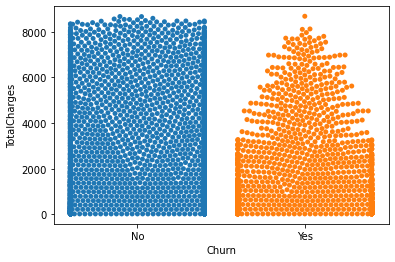

In [112]:
sns.swarmplot(df["Churn"],df["TotalCharges"])

TotalCharges increases the chances of Decreases

#### Before further analysis i need to encode the columns

In [118]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [151]:
obj = df.select_dtypes(exclude=np.number).columns

In [152]:
for i in obj:
    df[[i]] = lab_enc.fit_transform(df[[i]])

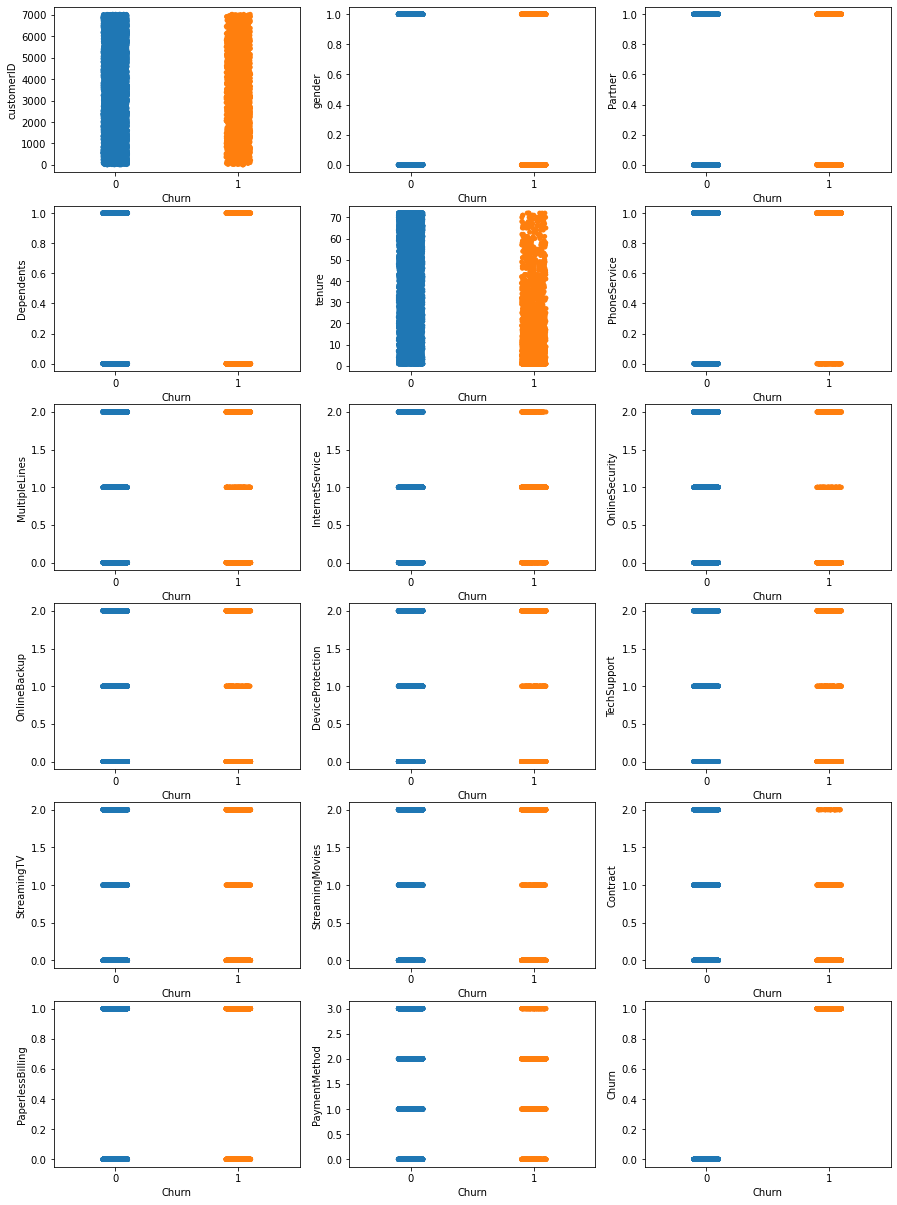

In [153]:
plotnumber = 1
plt.figure(figsize=(15,25))
for i in df.drop(["SeniorCitizen","MonthlyCharges","TotalCharges"],axis=1):
    if plotnumber < 22:
        ax = plt.subplot(7,3,plotnumber)
        sns.stripplot(df["Churn"],df[i])
        plotnumber+=1
plt.show()    

CustomerID has nothing to do with churn and Remaining data is also seems to equally related to Churn or not

### Multivariate Analysis

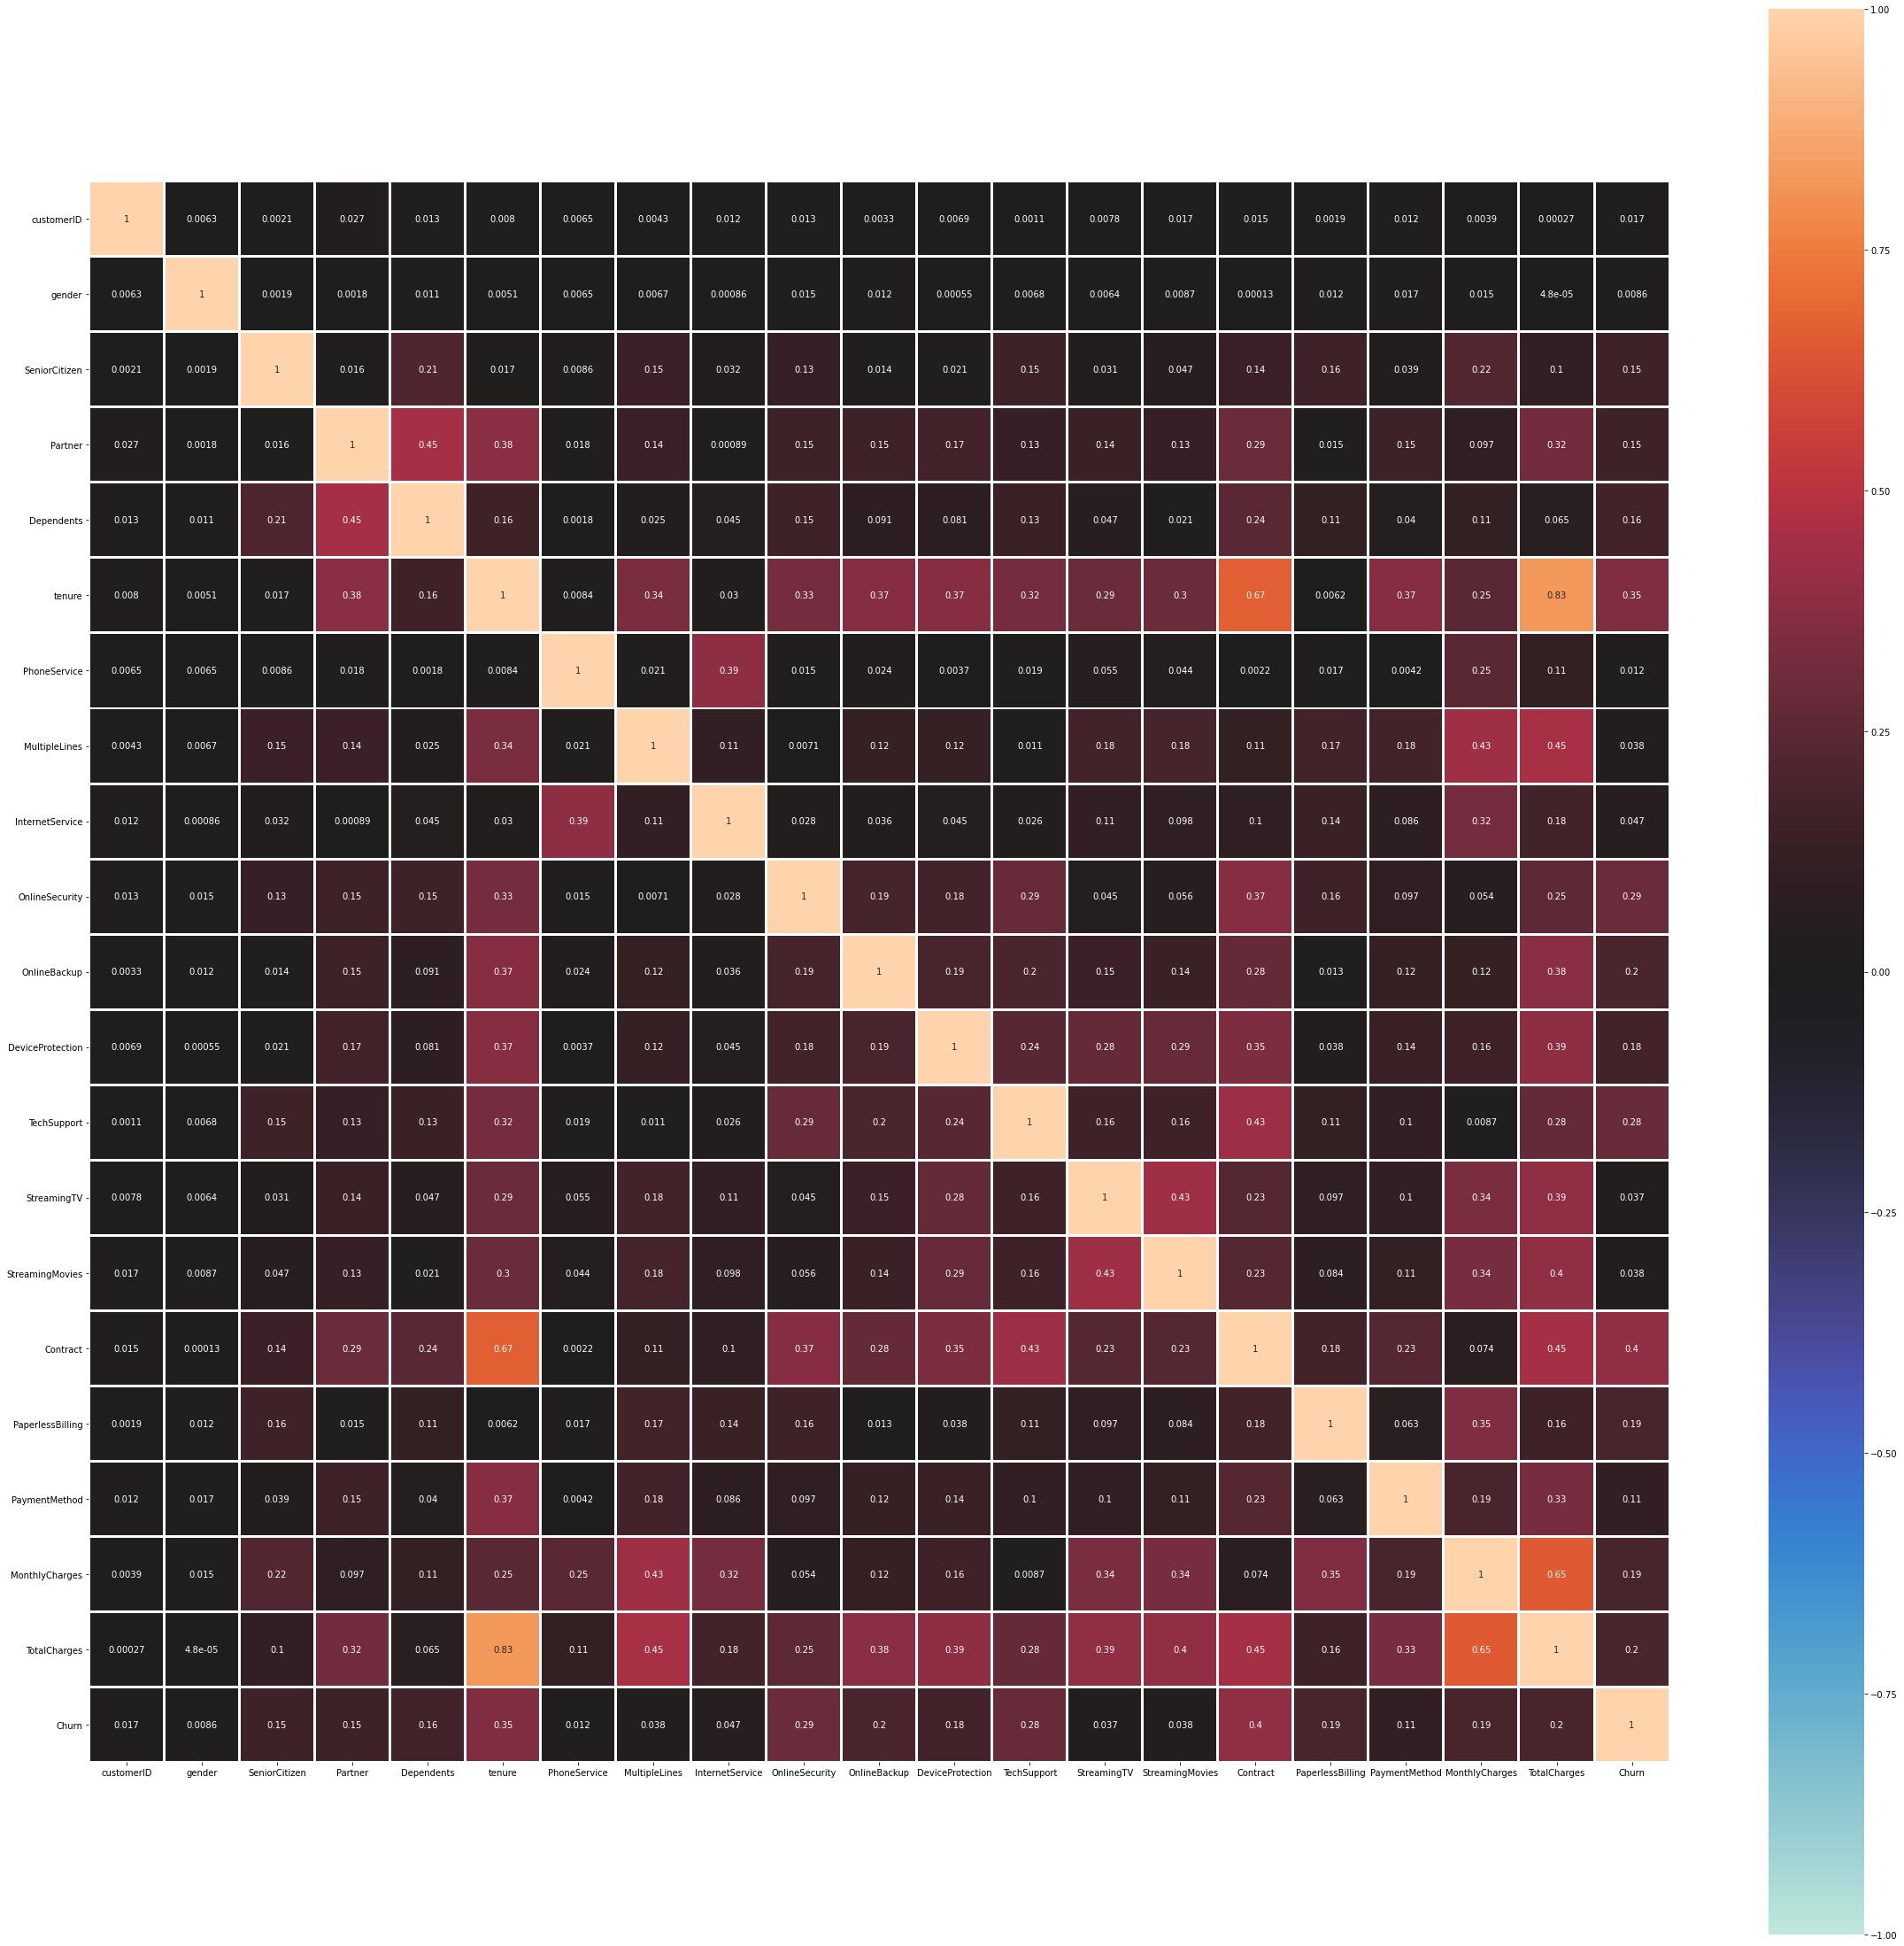

In [128]:
df_corr = df.corr().abs()
plt.figure(figsize=(40,40))
sns.heatmap(df_corr,annot=True,fmt='.2g',vmin=-1,vmax=1,square=True,center=0,linewidth=2)
plt.show()

<AxesSubplot:>

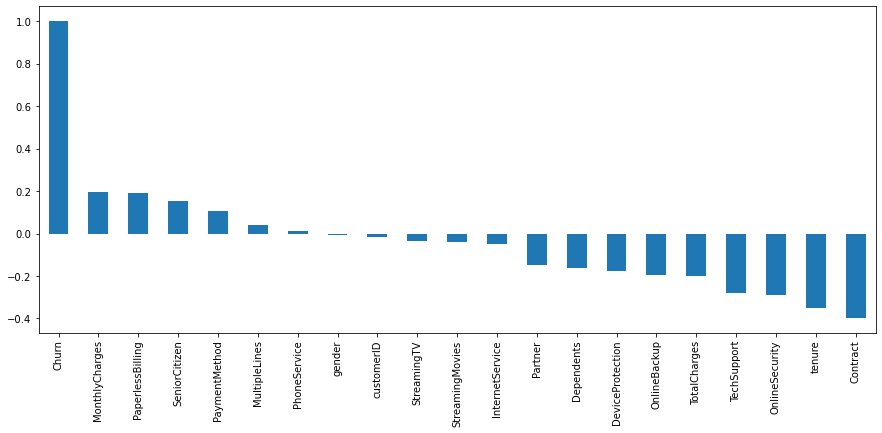

In [136]:
plt.figure(figsize=(15,6))
df.corr()["Churn"].sort_values(ascending=False).plot.bar()

Gender is the least related to the Target variable

In [137]:
df.corr()["Churn"]

customerID         -0.017447
gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
TotalCharges       -0.199484
Churn               1.000000
Name: Churn, dtype: float64

### DataCleanings

In [138]:
df.skew().to_frame(name='Skewness')

,Skewness
customerID,0.000000
gender,-0.019031
SeniorCitizen,1.833633
Partner,0.067922
Dependents,0.875199
tenure,0.239540
PhoneService,-2.727153
MultipleLines,0.118719
InternetService,0.205423
OnlineSecurity,0.416985


In [150]:
# Droping Nan from TotalCharges
df.dropna(inplace=True)

SeniorCitizen is discreate data(Whether a person above 60 or not). So not removing any skewness from that columns

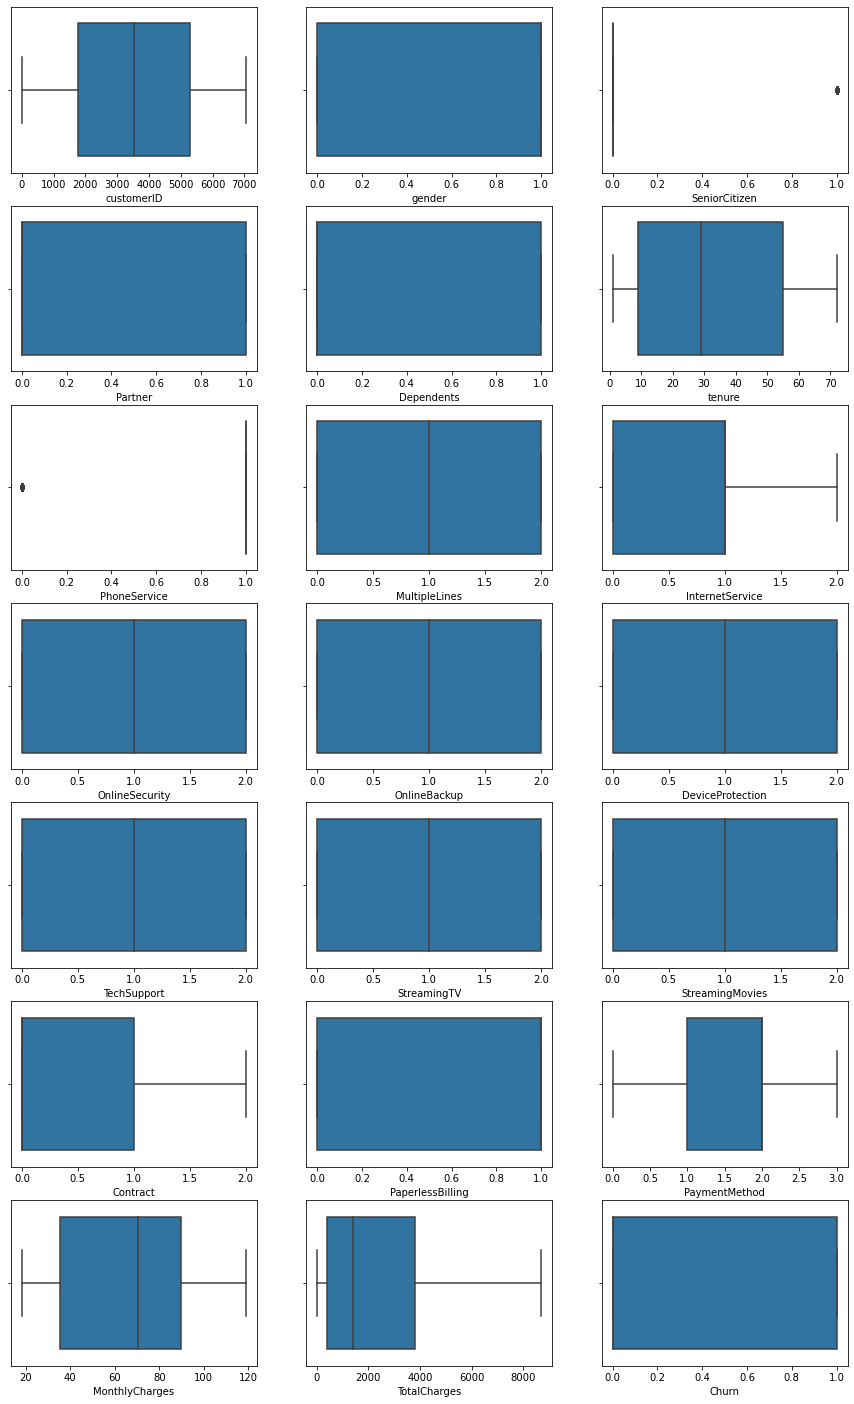

In [142]:
# Checking Outliers using boxplot
plotnumber = 1
plt.figure(figsize=(15,25))
for i in df:
    if plotnumber < 22:
        ax = plt.subplot(7,3,plotnumber)
        sns.boxplot(df[i])
        plotnumber+=1
plt.show()    

There is no Outliers in any Columns

In [155]:
## Applying square root transformation to take care of skewness in TotalCharges
df["TotalCharges"] = np.sqrt(df["TotalCharges"])

In [161]:
df.skew().to_frame(name='skewness')

,skewness
customerID,0.000000
gender,-0.018776
SeniorCitizen,1.831103
Partner,0.070024
Dependents,0.880908
tenure,0.237731
PhoneService,-2.729727
MultipleLines,0.118623
InternetService,0.205704
OnlineSecurity,0.418619


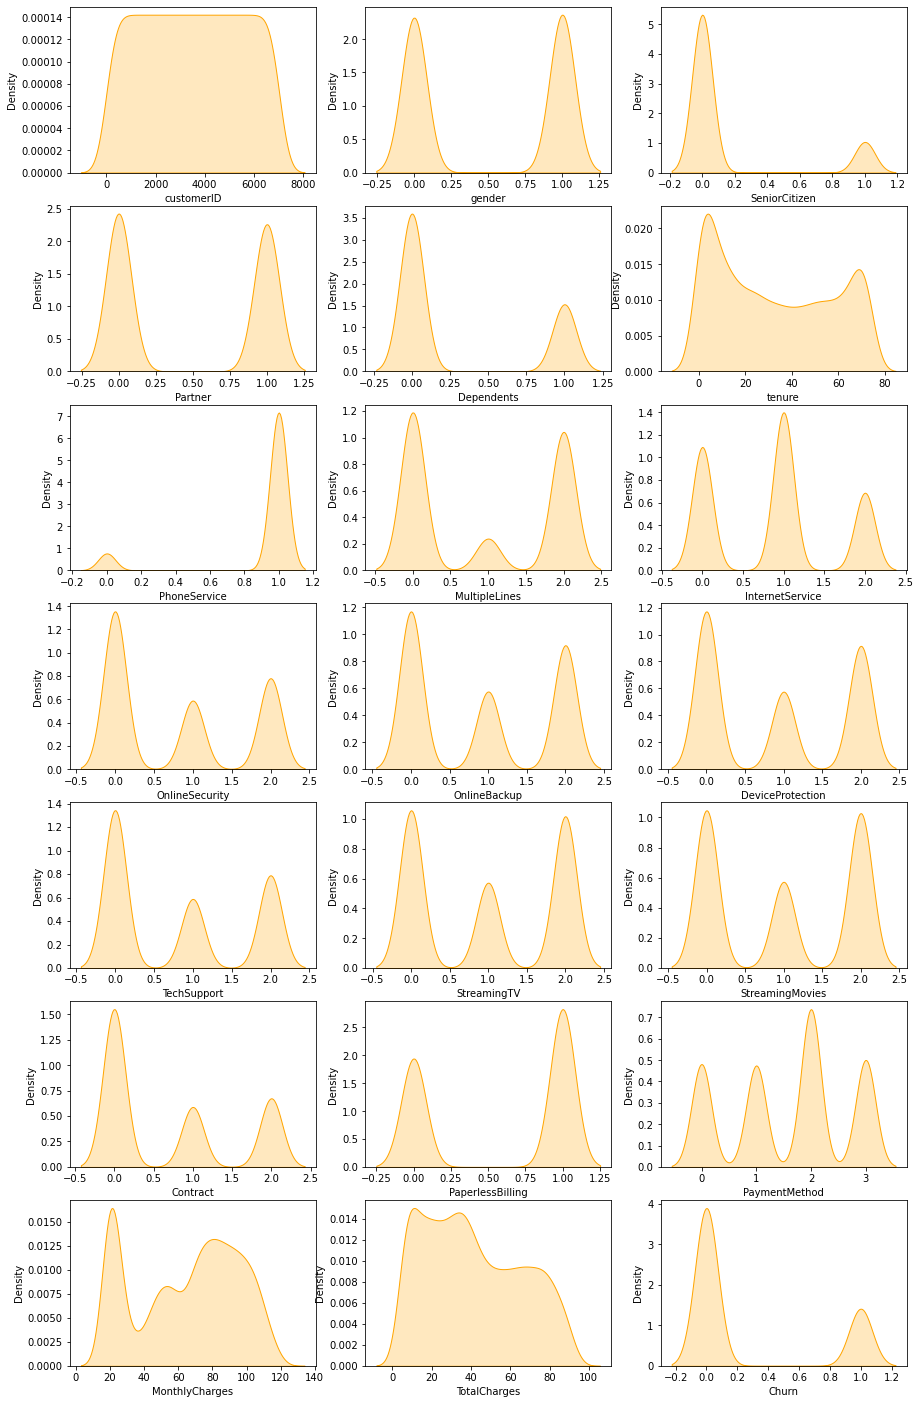

In [159]:
plotnumber = 1
plt.figure(figsize=(15,25))
for i in df:
    if plotnumber < 22:
        ax = plt.subplot(7,3,plotnumber)
        sns.kdeplot(df[i],data=df,fill=True,color='orange')
        plotnumber+=1
plt.show() 

Now it's seems to Guassian Distributed

#### Balancing the Target variable

In [164]:
df["Churn"].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [165]:
## Using smote to balances the Target columns
from sklearn.utils import resample
zero = df[df["Churn"]==0]
one = df[df["Churn"]==1]

In [166]:
up_sampled = resample(one,replace=True,n_samples=len(zero),random_state=0)

In [167]:
new_df=pd.concat([zero,up_sampled])

<AxesSubplot:>

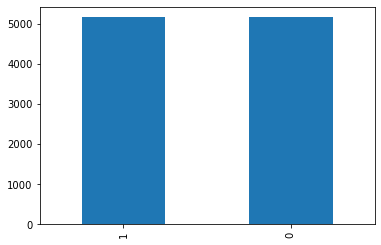

In [168]:
new_df["Churn"].value_counts().plot.bar()

In [169]:
x = new_df.drop("Churn",axis=1)
y = new_df["Churn"]

In [181]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [175]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

In [180]:
# Finding the best accuracy and Random State
max_accu = []
for i in range(1,300):
    x_train1,x_test1,y_train1,y_test1=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    mod = RandomForestClassifier()
    mod.fit(x_train1,y_train1)
    y_pred1 = mod.predict(x_test1)
    accu_score = accuracy_score(y_test1,y_pred1)
    max_accu.append(accu_score)
max_value = max(max_accu)
print("Max_accuracy :",max(max_accu),"Best Random State :", max_accu.index(max_value)+1)

Max_accuracy : 0.9089735313105229 Best Random State : 72


In [182]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=72)

In [215]:
k = KFold(n_splits=5,random_state=72)

In [380]:
accu = []
cross = []
diff = []

### LogisticRegression

In [381]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [382]:
y_pred = log_reg.predict(x_test)

In [383]:
a = accuracy_score(y_test,y_pred)

In [384]:
c = cross_val_score(log_reg,x_scaled,y,cv=5).mean()

In [385]:
print(" Accuracy Score :",a,"\n","=-"*60,"\n Cross validation score :",c,"\n","=-"*60,"\n Classification Report :\n",
      classification_report(y_test,y_pred),"\n","=-"*60,"\n Confusion Matrix :\n",confusion_matrix(y_test,y_pred))

 Accuracy Score : 0.7721110393802453 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Cross validation score : 0.687395793534898 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.75      0.77      1553
           1       0.76      0.80      0.78      1545

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.77      0.77      0.77      3098
 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Confusion Matrix :
 [[1158  395]
 [ 311 1234]]


In [386]:
accu.append(a)
cross.append(c)
diff.append(a-c)

### Bagging Classifier

In [402]:
bag_clf = BaggingClassifier()
bag_clf.fit(x_train,y_train)

BaggingClassifier()

In [403]:
y_pred = bag_clf.predict(x_test)

In [404]:
a = accuracy_score(y_test,y_pred)

In [405]:
c = cross_val_score(bag_clf,x_scaled,y,cv=5).mean()

In [406]:
print(" Accuracy Score :",a,"\n","=-"*60,"\n Cross validation score :",c,"\n","=-"*60,"\n Classification Report :\n",
      classification_report(y_test,y_pred),"\n","=-"*60,"\n Confusion Matrix :\n",confusion_matrix(y_test,y_pred))

 Accuracy Score : 0.8996126533247256 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Cross validation score : 0.8913430638798581 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.86      0.90      1553
           1       0.87      0.94      0.90      1545

    accuracy                           0.90      3098
   macro avg       0.90      0.90      0.90      3098
weighted avg       0.90      0.90      0.90      3098
 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Confusion Matrix :
 [[1333  220]
 [  91 1454]]


In [407]:
accu.append(a)
cross.append(c)
diff.append(a-c)

### RandomForest`

In [408]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [409]:
y_pred = rf.predict(x_test)

In [410]:
a = accuracy_score(y_test,y_pred)

In [413]:
c = cross_val_score(rf,x_scaled,y,cv=5).mean()

In [414]:
print(" Accuracy Score :",a,"\n","=-"*60,"\n Cross validation score :",c,"\n","=-"*60,"\n Classification Report :\n",
      classification_report(y_test,y_pred),"\n","=-"*60,"\n Confusion Matrix :\n",confusion_matrix(y_test,y_pred))

 Accuracy Score : 0.9054228534538412 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Cross validation score : 0.9013172100349485 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      1553
           1       0.87      0.96      0.91      1545

    accuracy                           0.91      3098
   macro avg       0.91      0.91      0.91      3098
weighted avg       0.91      0.91      0.91      3098
 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Confusion Matrix :
 [[1326  227]
 [  66 1479]]


In [415]:
accu.append(a)
cross.append(c)
diff.append(a-c)

### GradientBoosting

In [416]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [417]:
y_pred = gbc.predict(x_test)

In [418]:
a = accuracy_score(y_test,y_pred)

In [419]:
c = cross_val_score(gbc,x_scaled,y,cv=5).mean()

In [420]:
print(" Accuracy Score :",a,"\n","=-"*60,"\n Cross validation score :",c,"\n","=-"*60,"\n Classification Report :\n",
      classification_report(y_test,y_pred),"\n","=-"*60,"\n Confusion Matrix :\n",confusion_matrix(y_test,y_pred))

 Accuracy Score : 0.7934151065203358 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Cross validation score : 0.7845260401894855 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.75      0.78      1553
           1       0.77      0.84      0.80      1545

    accuracy                           0.79      3098
   macro avg       0.80      0.79      0.79      3098
weighted avg       0.80      0.79      0.79      3098
 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Confusion Matrix :
 [[1166  387]
 [ 253 1292]]


In [421]:
accu.append(a)
cross.append(c)
diff.append(a-c)

### KNeighborsClassifier

In [422]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [423]:
y_pred = knn.predict(x_test)

In [424]:
a = accuracy_score(y_test,y_pred)

In [425]:
c = cross_val_score(knn,x_scaled,y,cv=5).mean()

In [426]:
print(" Accuracy Score :",a,"\n","=-"*60,"\n Cross validation score :",c,"\n","=-"*60,"\n Classification Report :\n",
      classification_report(y_test,y_pred),"\n","=-"*60,"\n Confusion Matrix :\n",confusion_matrix(y_test,y_pred))

 Accuracy Score : 0.7727566171723693 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Cross validation score : 0.7672867526586332 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.68      0.75      1553
           1       0.73      0.87      0.79      1545

    accuracy                           0.77      3098
   macro avg       0.78      0.77      0.77      3098
weighted avg       0.78      0.77      0.77      3098
 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Confusion Matrix :
 [[1050  503]
 [ 201 1344]]


In [427]:
accu.append(a)
cross.append(c)
diff.append(a-c)

In [428]:
model = ["LogisticRegression","BaggingClassifier","RandomForest","GradientBoosting","KNeighbors"]

In [429]:
classifier = pd.DataFrame({"Model":model,
                          "Accuracy":accu,
                          "Cross validation score":cross,
                          "Difference":diff})

classifier

,Model,Accuracy,Cross validation score,Difference
0,LogisticRegression,0.772111,0.687396,0.084715
1,BaggingClassifier,0.899613,0.891343,0.008270
2,RandomForest,0.905423,0.901317,0.004106
3,GradientBoosting,0.793415,0.784526,0.008889
4,KNeighbors,0.772757,0.767287,0.005470


### Hyperparameter Tunnings

In [430]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [539]:
params = {"criterion":["gini","entropy"],
         "max_depth":[12,35,36,40],
         "max_features":[10,11,15,16],
         "n_estimators":[100,200,600,500,400,800],
         "min_samples_split":[3,2,4,5],
         "bootstrap":[True,False],
         }

In [565]:
rand_search = RandomizedSearchCV(rf,param_distributions=params)

In [566]:
rand_search.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(bootstrap=False,
                                                    max_depth=35,
                                                    max_features=11,
                                                    min_samples_split=4,
                                                    n_estimators=600),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [12, 35, 36, 40],
                                        'max_features': [10, 11, 15, 16],
                                        'min_samples_split': [3, 2, 4, 5],
                                        'n_estimators': [100, 200, 600, 500,
                                                         400, 800]})

In [567]:
rand_search.best_params_

{'n_estimators': 600,
 'min_samples_split': 3,
 'max_features': 11,
 'max_depth': 40,
 'criterion': 'gini',
 'bootstrap': False}

In [568]:
rf = RandomForestClassifier(n_estimators=600,min_samples_split=3,max_features=11,max_depth=40,criterion='gini',bootstrap=False)

In [569]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=40, max_features=11,
                       min_samples_split=3, n_estimators=600)

In [570]:
y_pred = rf.predict(x_test)

In [571]:
a = accuracy_score(y_test,y_pred)

In [574]:
c = cross_val_score(rf,x_scaled,y,cv=5).mean()

In [575]:
print(" Accuracy Score :",a,"\n","=-"*60,"\n Cross validation score :",c,"\n","=-"*60,"\n Classification Report :\n",
      classification_report(y_test,y_pred),"\n","=-"*60,"\n Confusion Matrix :\n",confusion_matrix(y_test,y_pred))

 Accuracy Score : 0.907359586830213 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Cross validation score : 0.9067413704569921 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Classification Report :
               precision    recall  f1-score   support

           0       0.94      0.87      0.90      1553
           1       0.88      0.94      0.91      1545

    accuracy                           0.91      3098
   macro avg       0.91      0.91      0.91      3098
weighted avg       0.91      0.91      0.91      3098
 
 =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=- 
 Confusion Matrix :
 [[1351  202]
 [  85 1460]]


### ROC AUC Curve

In [578]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve

#GradientBoostingClassifier
print("GradientBoostingClassifier roc_auc_score :",roc_auc_score(y_test,gbc.predict(x_test)))


#BaggingClassifier
print("BaggingClassifier roc_auc_score :",roc_auc_score(y_test,bag_clf.predict(x_test)))

#RandomForest
print("RandomForest roc_auc_score :",roc_auc_score(y_test,rf.predict(x_test)))

#KNeighbors
print("KNeighborsClassifier roc_auc_score :",roc_auc_score(y_test,knn.predict(x_test)))

#VotingClassifier
print("LogisticRegression roc_auc_score :",roc_auc_score(y_test,log_reg.predict(x_test)))

GradientBoostingClassifier roc_auc_score : 0.7935254242232905
BaggingClassifier roc_auc_score : 0.8997195114581445
RandomForest roc_auc_score : 0.9074564940599361
KNeighborsClassifier roc_auc_score : 0.7730068330009565
LogisticRegression roc_auc_score : 0.7721795376731955


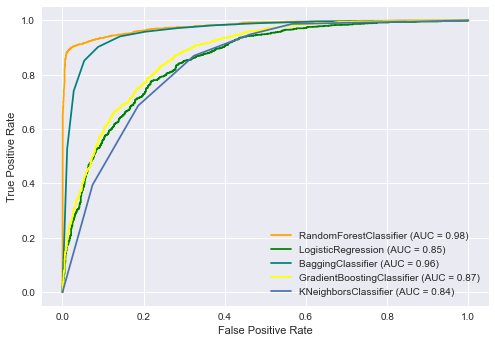

In [582]:
plt.style.use('seaborn')

disp = plot_roc_curve(rf,x_test,y_test,color='orange')
plot_roc_curve(log_reg,x_test,y_test,color='green',ax=disp.ax_)
plot_roc_curve(bag_clf,x_test,y_test,color='teal',ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,color='yellow',ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)

In [584]:
import pickle
pickle.dump(rf,open("Customer_churn.pk1","wb"))

In [585]:
load_model = pickle.load(open("Customer_churn.pk1","rb"))